# Mean Shift

Mean Shift is a hierarchical clustering algortihms. this algorithm uses the concept o kernel density estimation(KDE).

The data points used in this algorithm are distributed according to a probability distribution. Kernel is weighting function, most popular one is gaussian function. 

In [1]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
centers = [[1,1,1],[5,5,5],[3,10,10]]

x, _=make_blobs(n_samples=100, centers=centers, cluster_std=1.5)

In [3]:
ms=MeanShift()
ms.fit(x)

labels=ms.labels_
centroids=ms.cluster_centers_

In [4]:
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)
print(len(centroids))
print(len(labels))

Number of estimated clusters: 3
3
100


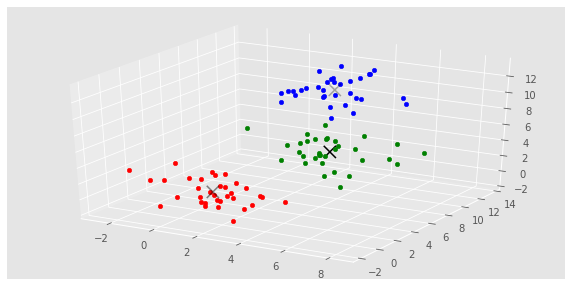

In [6]:
colors = 10*['r','g','b','c','k','y','m']

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111, projection='3d')

for i in range(len(x)):
  ax.scatter(x[i][0], x[i][1], x[i][2], color=colors[labels[i]], marker='o')

ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], marker='x', color='k', s=150, linewidths=5, zorder=10)

plt.show()

# Mean Shift from Scratch

In [8]:
X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

colors = 10*["g","r","c","b","k"]

In [9]:
class Mean_Shift:
  def __init__(self, radius=4):
    self.radius=radius
  
  def fit(self, data):
    centroids={}

    for i in range(len(data)):
      centroids[i]=data[i]
    
    while True:
      new_centroids=[]
      for i in centroids:
        centroid=centroids[i]
        pnts=[]
        for featureset in data:
          if np.linalg.norm(centroid-featureset) < self.radius:
            pnts.append(featureset)
        
        new_centroid=np.average(pnts, axis=0)
        new_centroids.append(tuple(new_centroid))

      uniques=sorted(list(set(new_centroids)))

      prev_centroids=dict(centroids)
      
      centroids={}
      for i in range(len(uniques)):
        centroids[i]=np.array(uniques[i])

      optimized=True
      for i in centroids:
        if not np.array_equal(prev_centroids[i], centroids[i]):
          optimized=False
        if not optimized:
          break
      
      if optimized:
        break
      
    self.centroids=centroids

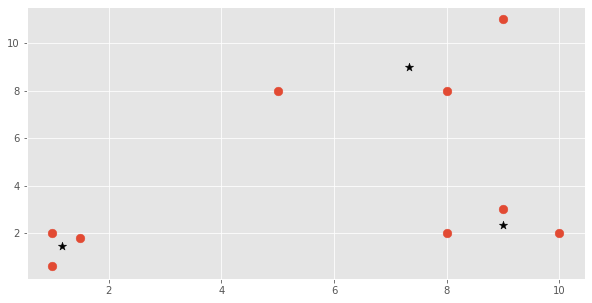

In [10]:
clf=Mean_Shift()
clf.fit(X)

centroids=clf.centroids

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], s=75)

for i in centroids:
  plt.scatter(centroids[i][0], centroids[i][1], color='k', marker='*', s=75)

plt.show()